In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Reading Dataset

In [2]:
df1= pd.read_csv("D:\Backup and Sync\Personal\Reas Estate Project\Data Set\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.0
1,Built-up Area,Ready To Move,Gottigere,2 BHK,NaN,1100,2.0,2.0,40.0
2,Built-up Area,Ready To Move,Kengeri,1 BHK,NaN,600,1.0,1.0,15.0
3,Built-up Area,20-Dec,Whitefield,3 BHK,NaN,1610,3.0,2.0,81.0
4,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,NaN,125.0


In [3]:
df1.shape

(13320, 9)

### Data PreProcessing 

###### Grouping the numbers based on their areatype

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

###### Droping some columns as they are not important for price prediction

In [5]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis= 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Uttarahalli,3 BHK,1440,2.0,62.0
1,Gottigere,2 BHK,1100,2.0,40.0
2,Kengeri,1 BHK,600,1.0,15.0
3,Whitefield,3 BHK,1610,3.0,81.0
4,Kasturi Nagar,3 BHK,1925,3.0,125.0


### Data Cleaning

##### Handling the missing values (NA value)

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

#### Droping these rows as we have more than 13000 rows and number of NA rows are signigficantly low. If this not the case then we can calculate the mean values and fill up those missing positions. 

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

#### Exploring size colums

In [9]:
df3['size'].unique()

array(['3 BHK', '2 BHK', '1 BHK', '8 Bedroom', '6 Bedroom', '3 Bedroom',
       '4 Bedroom', '4 BHK', '5 Bedroom', '2 Bedroom', '1 Bedroom',
       '5 BHK', '9 Bedroom', '7 Bedroom', '6 BHK', '7 BHK', '1 RK',
       '8 BHK', '9 BHK', '10 Bedroom', '11 Bedroom', '43 Bedroom',
       '12 Bedroom', '18 Bedroom', '11 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '14 BHK', '13 BHK'], dtype=object)

In [10]:
def split_bhk(x):
    bhk = x.split(' ')
    return int(bhk[0])

In [11]:
# as both BHK and Bedroom are the same thing, I am trying to make them similar by just keeping the numbers.

df3['bhk'] = df3['size'].apply(split_bhk)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df3

,location,size,total_sqft,bath,price,bhk
0,Uttarahalli,3 BHK,1440,2.0,62.0,3
1,Gottigere,2 BHK,1100,2.0,40.0,2
2,Kengeri,1 BHK,600,1.0,15.0,1
3,Whitefield,3 BHK,1610,3.0,81.0,3
4,Kasturi Nagar,3 BHK,1925,3.0,125.0,3
...,...,...,...,...,...,...
13315,Uttarahalli,3 BHK,1345,2.0,57.0,3
13316,Green Glen Layout,3 BHK,1715,3.0,112.0,3
13317,Richards Town,4 BHK,3600,5.0,400.0,4
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0,4


In [13]:
#Exploring BHK column

df3['bhk'].unique() 

array([ 3,  2,  1,  8,  6,  4,  5,  9,  7, 10, 11, 43, 12, 18, 27, 19, 16,
       14, 13], dtype=int64)

In [14]:
#we can see there are properties of extrem high nubers(43) this can be an error. 

df3[df3.bhk>10]

,location,size,total_sqft,bath,price,bhk
2757,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3098,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
3239,Munnekollal,43 Bedroom,2400,40.0,660.0,43
3510,Mysore Road,12 Bedroom,2232,6.0,300.0,12
4273,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18
4836,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
5657,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
6756,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
6893,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
7752,1Channasandra,14 BHK,1250,15.0,125.0,14


In [15]:
#Total squarefeet values are linked to bhk, their must be some balance between them, so now exploring the total_sqft column. 
df3.total_sqft.unique()

array(['1440', '1100', '600', ..., '250', '1133 - 1384', '4689'],
      dtype=object)

In [16]:
# We can see some rangeing in the values of total_sqft column, their must be some other type of values. 
# To check creating the following function.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [17]:
# We need those colums which does not have float value that's why used negate operator, Then we can make further processing.


df3[~df3['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
119,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
125,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
143,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.000,1
537,Volagerekallahalli,2 BHK,117Sq. Yards,2.0,38.000,2
591,Dodda Banaswadi,5 Bedroom,3040Sq. Meter,5.0,140.000,5
...,...,...,...,...,...,...
13087,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
13097,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13143,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13282,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
# There are several types of data avaiable in total_sqft, such as, range, Sq. Yards, Meters. 
# (Convet them could have been a solution)
# Only considering the mean value of the ranges, droping any other type of values.

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [20]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4

,location,size,total_sqft,bath,price,bhk
0,Uttarahalli,3 BHK,1440.0,2.0,62.0,3
1,Gottigere,2 BHK,1100.0,2.0,40.0,2
2,Kengeri,1 BHK,600.0,1.0,15.0,1
3,Whitefield,3 BHK,1610.0,3.0,81.0,3
4,Kasturi Nagar,3 BHK,1925.0,3.0,125.0,3
...,...,...,...,...,...,...
13315,Uttarahalli,3 BHK,1345.0,2.0,57.0,3
13316,Green Glen Layout,3 BHK,1715.0,3.0,112.0,3
13317,Richards Town,4 BHK,3600.0,5.0,400.0,4
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4


### Feature Enginering

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Uttarahalli,3 BHK,1440.0,2.0,62.0,3
1,Gottigere,2 BHK,1100.0,2.0,40.0,2
2,Kengeri,1 BHK,600.0,1.0,15.0,1
3,Whitefield,3 BHK,1610.0,3.0,81.0,3
4,Kasturi Nagar,3 BHK,1925.0,3.0,125.0,3


In [22]:
#copy to new dataframe
df5 = df4.copy()
#calculating price per square feet as it is an important aspect of realestate business

df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Uttarahalli,3 BHK,1440.0,2.0,62.0,3,4305.555556
1,Gottigere,2 BHK,1100.0,2.0,40.0,2,3636.363636
2,Kengeri,1 BHK,600.0,1.0,15.0,1,2500.000000
3,Whitefield,3 BHK,1610.0,3.0,81.0,3,5031.055901
4,Kasturi Nagar,3 BHK,1925.0,3.0,125.0,3,6493.506494


In [23]:
#now let's find out how many different locations are available, if the number is small then it is okay. other wise it will be
# higher dimentionality problem, we need to reducue that dimention of our data. 

df5.location.unique()


array(['Uttarahalli', 'Gottigere', 'Kengeri', ..., 'Kanakapur main road',
       'Tilak Nagar', '12th cross srinivas nagar banshankari 3rd stage'],
      dtype=object)

In [24]:
# get the exact numbers
len(df5.location.unique())

1298

In [25]:
#Let's find some locations that have very low no. of entry. And take a threashold value so that we can signaficantly 
#the number of unique location rows. 

df5.location = df5.location.apply(lambda x: x.strip())

In [26]:
location_stats=df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [27]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [28]:
#let's try to guess the threshold value
len(location_stats[location_stats<=10])

1047

In [29]:
#As significant numbers of locations are less than 10 then we can reduce them and label them as a common name.(Other)
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [30]:
len(df5.location.unique())

1287

In [31]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [32]:
df5


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Uttarahalli,3 BHK,1440.0,2.0,62.0,3,4305.555556
1,Gottigere,2 BHK,1100.0,2.0,40.0,2,3636.363636
2,Kengeri,1 BHK,600.0,1.0,15.0,1,2500.000000
3,Whitefield,3 BHK,1610.0,3.0,81.0,3,5031.055901
4,Kasturi Nagar,3 BHK,1925.0,3.0,125.0,3,6493.506494
...,...,...,...,...,...,...,...
13315,Uttarahalli,3 BHK,1345.0,2.0,57.0,3,4237.918216
13316,Green Glen Layout,3 BHK,1715.0,3.0,112.0,3,6530.612245
13317,other,4 BHK,3600.0,5.0,400.0,4,11111.111111
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407.336319


### Outlier Removal

In [33]:
# There are several ways to remove outliers such as find traditional standard deviation, other than that we can apply domain
# domain knowledge. For example, a bed room of a house is typically 300sqft. Now let's find out any house out there 
# having less than 300 sqft bedroom

df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
87,other,4 BHK,1150.0,4.0,260.0,4,22608.695652
144,other,6 Bedroom,900.0,7.0,76.0,6,8444.444444
146,other,7 Bedroom,1875.0,2.0,300.0,7,16000.000000
158,TC Palaya,6 Bedroom,1000.0,6.0,69.0,6,6900.000000
...,...,...,...,...,...,...,...
12840,Electronic City,2 BHK,550.0,2.0,16.0,2,2909.090909
12875,Marsur,2 BHK,497.0,1.0,20.0,2,4024.144869
13155,Shivaji Nagar,2 BHK,500.0,1.0,20.0,2,4000.000000
13205,other,7 BHK,1800.0,5.0,65.0,7,3611.111111


In [34]:
df5.shape

(13200, 7)

In [35]:
#Now create another data frame and remove some outlier
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
# now filterout outliers from price per squarefeet column, Writing a userdefine function, 
# as we can see min price is 267 and max is 176470 that means there are outliers,
# so we will keep values up to one standard deviation and revome rest of them 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # grouping locations
        m = np.mean(subdf.price_per_sqft) #calculating mean of a particular location 
        st = np.std(subdf.price_per_sqft) #calculating standard deviation a particular location
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # remove points above and 
                                                                                           # below one SD
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape


(10242, 7)

### Now drawing scatter plot to see any anomalies in price of 2BHK and 3BHK of same Sqft at a same location, that can be an outlier too. 

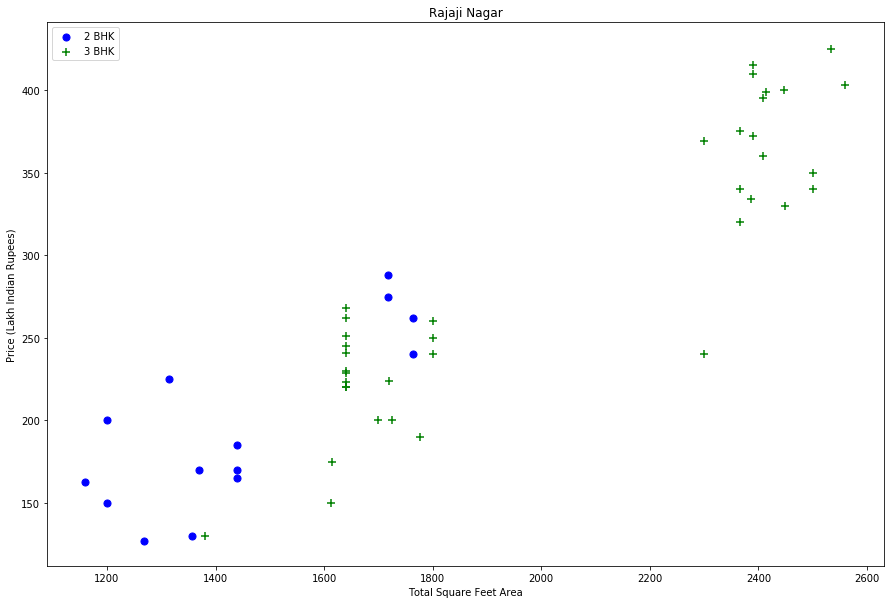

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

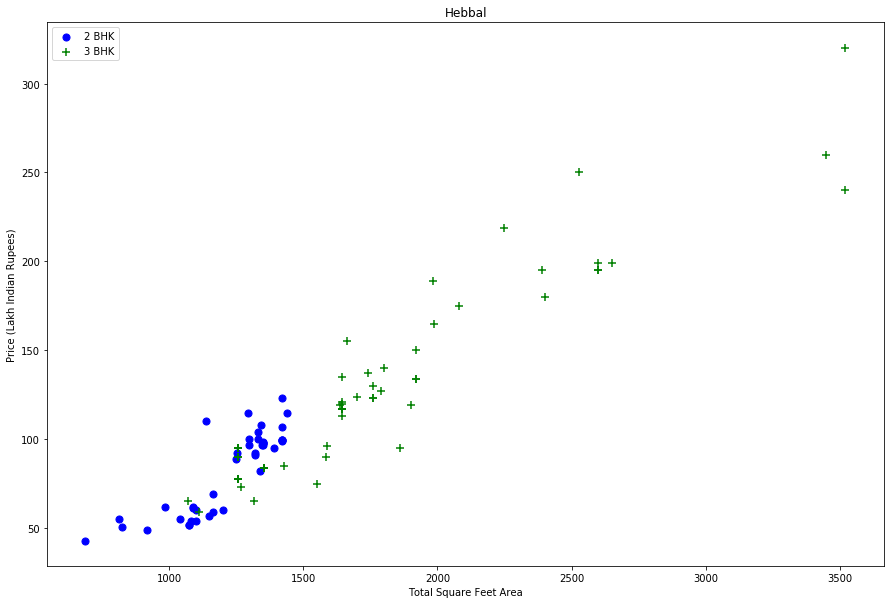

In [39]:
plot_scatter_chart(df7,"Hebbal")

#####  We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [40]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

# df8 = df7.copy()
df8.shape

(7317, 7)

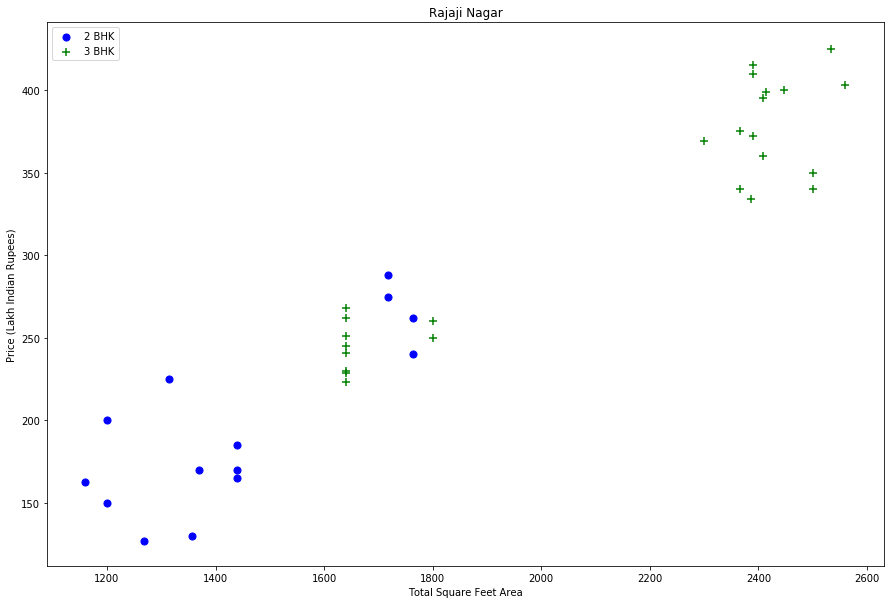

In [41]:
plot_scatter_chart(df8,"Rajaji Nagar")

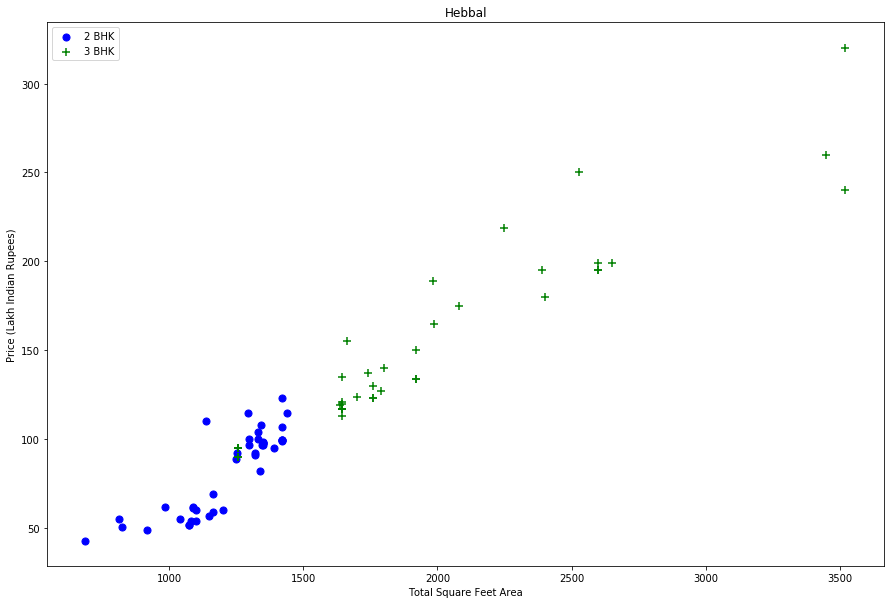

In [42]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

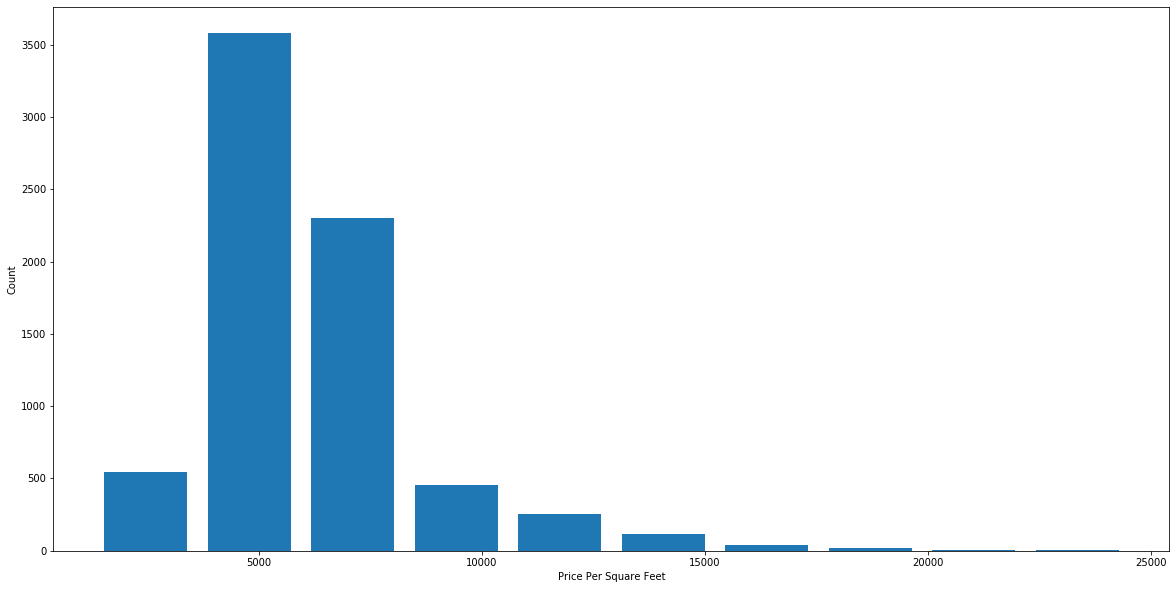

In [43]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [44]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9223,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9267,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9676,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9873,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


##### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [46]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [47]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
1,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860


##### Now removing some columns which we have created for our needs such as price per square feet, size(We have BHK) and our dataset is now clean enough to build a model.  

In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1200.0,2.0,130.0,3
1,1st Block Jayanagar,2850.0,4.0,428.0,4
2,1st Block Jayanagar,1630.0,3.0,194.0,3


# Building Model

### 1 Hot Encoding

In [49]:
dummies= pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
 # droping other colum because we can live with one less column, as we can represent them with all zero(0) 
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12=df11.drop('location',axis='columns')
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7239, 244)

In [53]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = df12.price
y.head()

0    130.0
1    428.0
2    194.0
3    235.0
4    148.0
Name: price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

#### Just one fold train and test

In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8712860151263707

#### K - fold cross validation for better result

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.84741612, 0.87820149, 0.88707208, 0.85013053, 0.85884269])

#### Price prediction function

In [58]:
def predict_price(location, sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [59]:
predict_price('Vijayanagar',600,2,2)

23.721201148908754

In [60]:
predict_price('Vishveshwarya Layout',1200,2,2)

30.269890321911873

In [61]:
predict_price('Indira Nagar',1200,2,3)

198.5354856381862

In [62]:
predict_price('1st Phase JP Nagar',1800,3,3)

152.56228918453508